In [1]:
import pandas as pd
import numpy as np

In [2]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', delimiter=',', skipinitialspace=True, skiprows = 1, header = None)


In [3]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
test_set.columns = col_labels

In [4]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  wage_class      16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [5]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [6]:
test_set.drop(['capital_gain','capital_loss'],axis=1,inplace=True)

In [7]:
test_set['wage_class'].unique()

array(['<=50K.', '>50K.'], dtype=object)

In [8]:
test_set['wage_class'] = np.where(test_set['wage_class']=='<=50K.',0,1)

In [9]:
test_set['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [10]:
test_set['workclass'] = test_set['workclass'].map({'Private':0,'Local-gov':1,'?':2,'Self-emp-not-inc':3,'Federal-gov':4,
                                                  'State-gov':5,'Self-emp-inc':6,'Without-pay':7,'Never-worked':8}).astype(int)

In [11]:
test_set['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [12]:
test_set.drop('education',axis=1,inplace=True)

In [13]:
test_set['marital_status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [14]:
test_set['marital_status']=test_set['marital_status'].map({'Married-civ-spouse':1, 'Never-married':0, 'Divorced':3,
'Separated':4, 'Widowed':2, 'Married-spouse-absent':5, 
'Married-AF-spouse':6}).astype(int)

In [15]:
test_set['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [16]:
occ = {'Adm-clerical':7,'Exec-managerial':8,'Handlers-cleaners':13,'Prof-specialty':5,
'Other-service':4,'Sales':10,'Craft-repair':6,'Transport-moving':12,
'Farming-fishing':1,'Machine-op-inspct':0,'Tech-support':9,'?':3,'Protective-serv':2,
'Armed-Forces':14,'Priv-house-serv':11,   
}

In [17]:
test_set['occupation'] = test_set['occupation'].map(occ).astype(int)

In [18]:
test_set['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [19]:
test_set['relationship'] = test_set['relationship'].map({'Not-in-family':2,'Husband':1,'Wife':4,'Own-child':0,'Unmarried':3,
                                                          'Other-relative':5}).astype(int)

In [20]:
test_set['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [21]:
test_set['race'] = test_set['race'].map({'White':1,'Black':0,'Asian-Pac-Islander':2,'Amer-Indian-Eskimo':4,
       'Other':3}).astype(int)

In [22]:
test_set['sex'] = test_set['sex'].map({'Male':0,'Female':1})

In [23]:
test_set['native_country'] = test_set['native_country'].map({'?':0,'United-States':1, 'Mexico':2, 'Philippines':3,
'Germany':4, 'Canada':5, 'Puerto-Rico':6, 'El-Salvador':7, 
'India':8, 'Cuba':9, 'England':10,'Jamaica':11, 'South':12, 
'China':13, 'Italy':14, 'Dominican-Republic':15, 'Vietnam':16,
'Guatemala':17, 'Japan':18, 'Poland':19, 'Columbia':20, 'Taiwan':21,
'Haiti':22, 'Iran':23, 'Portugal':24, 'Nicaragua':25, 'Peru':26, 
'France':27, 'Greece':28, 'Ecuador':29, 'Ireland':30,'Hong':31,
'Trinadad&Tobago':32, 'Cambodia':33, 'Laos':34, 'Thailand':35, 
'Yugoslavia':36, 'Outlying-US(Guam-USVI-etc)':37, 'Hungary':38,
'Honduras':39, 'Scotland':40, 'Holand-Netherlands':41}).astype(int)

In [24]:
test_set.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,wage_class
0,25,0,226802,7,0,0,0,0,0,40,1,0
1,38,0,89814,9,1,1,1,1,0,50,1,0
2,28,1,336951,12,1,2,1,1,0,40,1,1
3,44,0,160323,10,1,0,1,0,0,40,1,1
4,18,2,103497,10,0,3,0,1,1,30,1,0


In [25]:
test_set['hours_per_week'] = test_set['hours_per_week'].astype(int)
test_set.loc[test_set['hours_per_week'] < 40, 'hours_per_week'] = 0
test_set.loc[test_set['hours_per_week'] == 40, 'hours_per_week'] = 1
test_set.loc[test_set['hours_per_week'] > 40, 'hours_per_week'] = 2

In [26]:
test_set.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,wage_class
0,25,0,226802,7,0,0,0,0,0,1,1,0
1,38,0,89814,9,1,1,1,1,0,2,1,0
2,28,1,336951,12,1,2,1,1,0,1,1,1
3,44,0,160323,10,1,0,1,0,0,1,1,1
4,18,2,103497,10,0,3,0,1,1,0,1,0


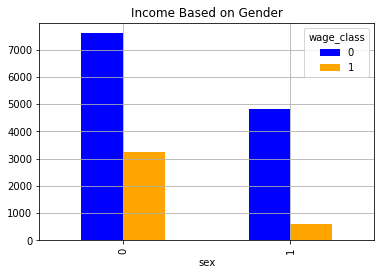

In [27]:
genderincom = pd.crosstab(test_set['sex'], test_set['wage_class'])
genderincom.plot(kind = 'bar', color = ['blue','orange'], grid = True, title = 'Income Based on Gender')

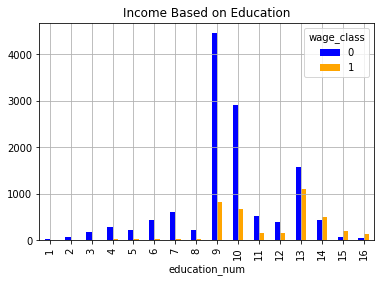

In [28]:
eduincome = pd.crosstab(test_set['education_num'], test_set['wage_class'])
eduincome.plot(kind = 'bar', color = ['blue','orange'], grid = True, title = 'Income Based on Education')

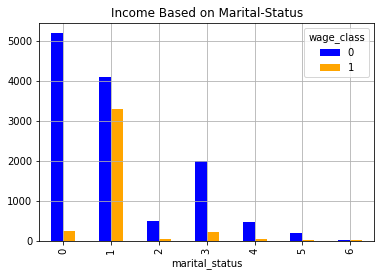

In [29]:
martialstatusincome = pd.crosstab(test_set['marital_status'], test_set['wage_class'])
martialstatusincome .plot(kind = 'bar', color = ['blue','orange'], grid = True, title = 'Income Based on Marital-Status')

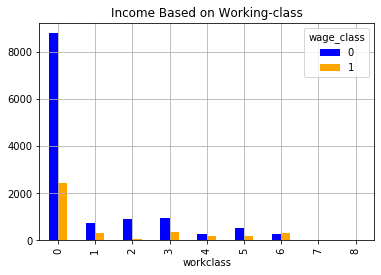

In [30]:
workclassincome = pd.crosstab(test_set['workclass'], test_set['wage_class'])
workclassincome .plot(kind = 'bar', color = ['blue','orange'], grid = True, title = 'Income Based on Working-class')

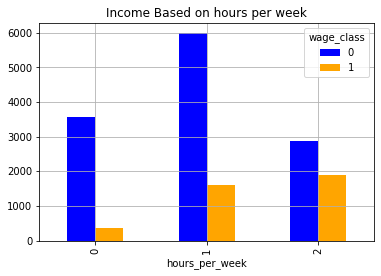

In [32]:
hrsperweekincome = pd.crosstab(test_set['hours_per_week'], test_set['wage_class'])
hrsperweekincome .plot(kind = 'bar', color = ['blue','orange'], grid = True, title = 'Income Based on hours per week')

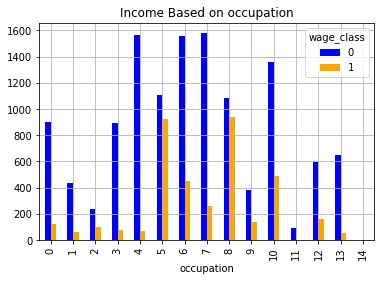

In [34]:
occincome = pd.crosstab(test_set['occupation'], test_set['wage_class'])
occincome .plot(kind = 'bar', color = ['blue','orange'], grid = True, title = 'Income Based on occupation')

In [36]:
y= test_set['wage_class']
x=test_set.drop('wage_class', axis=1)


In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

In [38]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X_scaled,y,test_size=0.3,random_state=400)

# KNN classifier

In [47]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(train_x,train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [49]:
knn.score(train_x,train_y)

0.49002447045249464

In [59]:
knn.score(test_x,test_y)

0.25482617489433845

In [60]:
KNN_prediction = knn.predict(test_x)
predictions_new = [round(value) for value in KNN_prediction]


In [62]:
print("The accuracy score is : ", accuracy_score(test_y,predictions_new))

The accuracy score is :  0.8151484135107472


Hyperparameter tuning

In [63]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute','auto'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [64]:
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [65]:
gridsearch.fit(train_x,train_y)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.191, total=   0.9s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.146, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.168, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.136, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.139, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.259, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.230, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.264, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.204, total= 

[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=9, score=0.289, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=9, score=0.306, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=9, score=0.246, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=9, score=0.271, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=10, score=0.324, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=10, score=0.298, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=10, score=0.311, tota

[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=12, score=0.337, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=12, score=0.306, total=   0.8s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=12, score=0.325, total=   0.8s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=12, score=0.260, total=   0.8s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=12, score=0.285, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=13, score=0.339, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=13, score=0.313, 

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, score=0.139, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.259, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.230, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.264, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.204, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.226, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, score=0.296, total= 

[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=9, score=0.246, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=9, score=0.271, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.324, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.298, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.311, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.250, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.279, to

[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=12, score=0.306, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=12, score=0.325, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=12, score=0.260, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=12, score=0.285, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=13, score=0.339, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=13, score=0.313, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=13, score=0.318, 

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, score=0.259, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, score=0.230, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, score=0.264, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, score=0.204, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, score=0.226, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=7, score=0.296, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=7, score=0.265, total=   0.4s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=9, score=0.271, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.324, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.298, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.311, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.250, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.279, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=11, score=0.333, total=   0.5s
[

[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=12, score=0.260, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=12, score=0.285, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.339, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.313, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.318, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.265, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.286, total=   0.5s


[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=5, score=0.264, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=5, score=0.204, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=5, score=0.226, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=7, score=0.296, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=7, score=0.265, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=7, score=0.295, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=7, score=0.241, total=   0.5s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=10, score=0.298, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=10, score=0.311, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=10, score=0.250, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=10, score=0.279, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=11, score=0.333, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=11, score=0.304, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=11, score=0.319, total=   0.5s


[CV]  algorithm=brute, leaf_size=18, n_neighbors=13, score=0.313, total=   0.8s
[CV] algorithm=brute, leaf_size=18, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=13, score=0.318, total=   0.8s
[CV] algorithm=brute, leaf_size=18, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=13, score=0.265, total=   0.8s
[CV] algorithm=brute, leaf_size=18, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=13, score=0.286, total=   0.8s
[CV] algorithm=brute, leaf_size=20, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=3, score=0.191, total=   0.6s
[CV] algorithm=brute, leaf_size=20, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=3, score=0.146, total=   0.7s
[CV] algorithm=brute, leaf_size=20, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=3, score=0.168, total=   0.7s
[CV] algorithm=br

[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, score=0.265, total=   0.8s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, score=0.295, total=   0.8s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, score=0.241, total=   0.8s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, score=0.249, total=   0.8s
[CV] algorithm=brute, leaf_size=25, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=9, score=0.323, total=   0.8s
[CV] algorithm=brute, leaf_size=25, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=9, score=0.289, total=   0.8s
[CV] algorithm=brute, leaf_size=25, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=9, score=0.307, total=   0.8s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=27, n_neighbors=11, score=0.304, total=   0.8s
[CV] algorithm=brute, leaf_size=27, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=11, score=0.319, total=   0.8s
[CV] algorithm=brute, leaf_size=27, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=11, score=0.253, total=   0.8s
[CV] algorithm=brute, leaf_size=27, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=11, score=0.281, total=   0.8s
[CV] algorithm=brute, leaf_size=27, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=12, score=0.337, total=   0.8s
[CV] algorithm=brute, leaf_size=27, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=12, score=0.306, total=   0.9s
[CV] algorithm=brute, leaf_size=27, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=12, score=0.325, total=   0.8s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=32, n_neighbors=3, score=0.146, total=   0.7s
[CV] algorithm=brute, leaf_size=32, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=3, score=0.168, total=   0.7s
[CV] algorithm=brute, leaf_size=32, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=3, score=0.136, total=   0.7s
[CV] algorithm=brute, leaf_size=32, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=3, score=0.139, total=   0.7s
[CV] algorithm=brute, leaf_size=32, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=5, score=0.259, total=   0.9s
[CV] algorithm=brute, leaf_size=32, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=5, score=0.230, total=   0.8s
[CV] algorithm=brute, leaf_size=32, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=5, score=0.264, total=   0.8s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=34, n_neighbors=9, score=0.289, total=   0.8s
[CV] algorithm=brute, leaf_size=34, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=9, score=0.307, total=   0.8s
[CV] algorithm=brute, leaf_size=34, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=9, score=0.246, total=   0.8s
[CV] algorithm=brute, leaf_size=34, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=9, score=0.271, total=   0.8s
[CV] algorithm=brute, leaf_size=34, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=10, score=0.324, total=   0.8s
[CV] algorithm=brute, leaf_size=34, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=10, score=0.298, total=   0.8s
[CV] algorithm=brute, leaf_size=34, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=10, score=0.311, total=   0.8s
[CV] algorithm=bru

[CV]  algorithm=auto, leaf_size=18, n_neighbors=12, score=0.306, total=   0.5s
[CV] algorithm=auto, leaf_size=18, n_neighbors=12 ....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=12, score=0.325, total=   0.5s
[CV] algorithm=auto, leaf_size=18, n_neighbors=12 ....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=12, score=0.260, total=   0.5s
[CV] algorithm=auto, leaf_size=18, n_neighbors=12 ....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=12, score=0.285, total=   0.5s
[CV] algorithm=auto, leaf_size=18, n_neighbors=13 ....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=13, score=0.339, total=   0.5s
[CV] algorithm=auto, leaf_size=18, n_neighbors=13 ....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=13, score=0.313, total=   0.5s
[CV] algorithm=auto, leaf_size=18, n_neighbors=13 ....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=13, score=0.318, total=   0.5s
[CV] algorithm=auto, 

[CV]  algorithm=auto, leaf_size=25, n_neighbors=5, score=0.230, total=   0.4s
[CV] algorithm=auto, leaf_size=25, n_neighbors=5 .....................
[CV]  algorithm=auto, leaf_size=25, n_neighbors=5, score=0.264, total=   0.4s
[CV] algorithm=auto, leaf_size=25, n_neighbors=5 .....................
[CV]  algorithm=auto, leaf_size=25, n_neighbors=5, score=0.204, total=   0.4s
[CV] algorithm=auto, leaf_size=25, n_neighbors=5 .....................
[CV]  algorithm=auto, leaf_size=25, n_neighbors=5, score=0.226, total=   0.4s
[CV] algorithm=auto, leaf_size=25, n_neighbors=7 .....................
[CV]  algorithm=auto, leaf_size=25, n_neighbors=7, score=0.296, total=   0.4s
[CV] algorithm=auto, leaf_size=25, n_neighbors=7 .....................
[CV]  algorithm=auto, leaf_size=25, n_neighbors=7, score=0.265, total=   0.4s
[CV] algorithm=auto, leaf_size=25, n_neighbors=7 .....................
[CV]  algorithm=auto, leaf_size=25, n_neighbors=7, score=0.295, total=   0.4s
[CV] algorithm=auto, leaf_si

[CV]  algorithm=auto, leaf_size=27, n_neighbors=10, score=0.298, total=   0.5s
[CV] algorithm=auto, leaf_size=27, n_neighbors=10 ....................
[CV]  algorithm=auto, leaf_size=27, n_neighbors=10, score=0.311, total=   0.5s
[CV] algorithm=auto, leaf_size=27, n_neighbors=10 ....................
[CV]  algorithm=auto, leaf_size=27, n_neighbors=10, score=0.250, total=   0.5s
[CV] algorithm=auto, leaf_size=27, n_neighbors=10 ....................
[CV]  algorithm=auto, leaf_size=27, n_neighbors=10, score=0.279, total=   0.5s
[CV] algorithm=auto, leaf_size=27, n_neighbors=11 ....................
[CV]  algorithm=auto, leaf_size=27, n_neighbors=11, score=0.333, total=   0.5s
[CV] algorithm=auto, leaf_size=27, n_neighbors=11 ....................
[CV]  algorithm=auto, leaf_size=27, n_neighbors=11, score=0.304, total=   0.6s
[CV] algorithm=auto, leaf_size=27, n_neighbors=11 ....................
[CV]  algorithm=auto, leaf_size=27, n_neighbors=11, score=0.319, total=   0.5s
[CV] algorithm=auto, 

[CV]  algorithm=auto, leaf_size=30, n_neighbors=13, score=0.313, total=   0.5s
[CV] algorithm=auto, leaf_size=30, n_neighbors=13 ....................
[CV]  algorithm=auto, leaf_size=30, n_neighbors=13, score=0.318, total=   0.5s
[CV] algorithm=auto, leaf_size=30, n_neighbors=13 ....................
[CV]  algorithm=auto, leaf_size=30, n_neighbors=13, score=0.265, total=   0.5s
[CV] algorithm=auto, leaf_size=30, n_neighbors=13 ....................
[CV]  algorithm=auto, leaf_size=30, n_neighbors=13, score=0.286, total=   0.5s
[CV] algorithm=auto, leaf_size=32, n_neighbors=3 .....................
[CV]  algorithm=auto, leaf_size=32, n_neighbors=3, score=0.191, total=   0.4s
[CV] algorithm=auto, leaf_size=32, n_neighbors=3 .....................
[CV]  algorithm=auto, leaf_size=32, n_neighbors=3, score=0.146, total=   0.4s
[CV] algorithm=auto, leaf_size=32, n_neighbors=3 .....................
[CV]  algorithm=auto, leaf_size=32, n_neighbors=3, score=0.168, total=   0.4s
[CV] algorithm=auto, lea

[CV]  algorithm=auto, leaf_size=34, n_neighbors=7, score=0.265, total=   0.4s
[CV] algorithm=auto, leaf_size=34, n_neighbors=7 .....................
[CV]  algorithm=auto, leaf_size=34, n_neighbors=7, score=0.295, total=   0.4s
[CV] algorithm=auto, leaf_size=34, n_neighbors=7 .....................
[CV]  algorithm=auto, leaf_size=34, n_neighbors=7, score=0.241, total=   0.4s
[CV] algorithm=auto, leaf_size=34, n_neighbors=7 .....................
[CV]  algorithm=auto, leaf_size=34, n_neighbors=7, score=0.249, total=   0.4s
[CV] algorithm=auto, leaf_size=34, n_neighbors=9 .....................
[CV]  algorithm=auto, leaf_size=34, n_neighbors=9, score=0.323, total=   0.4s
[CV] algorithm=auto, leaf_size=34, n_neighbors=9 .....................
[CV]  algorithm=auto, leaf_size=34, n_neighbors=9, score=0.289, total=   0.4s
[CV] algorithm=auto, leaf_size=34, n_neighbors=9 .....................
[CV]  algorithm=auto, leaf_size=34, n_neighbors=9, score=0.307, total=   0.4s
[CV] algorithm=auto, leaf_si

[Parallel(n_jobs=1)]: Done 1120 out of 1120 | elapsed: 10.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [66]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 13}

In [67]:
knn = KNeighborsRegressor(algorithm = 'ball_tree', leaf_size =18, n_neighbors =13)

In [68]:
knn.fit(train_x,train_y)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=18, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                    weights='uniform')

In [69]:
knn.score(train_x,train_y)

0.40790620806909983

In [70]:
knn.score(test_x,test_y)

0.31570013767583793

In [71]:
KNN_prediction = knn.predict(test_x)
predictions_new = [round(value) for value in KNN_prediction]

In [72]:
print("The accuracy score is : ", accuracy_score(test_y,predictions_new))

The accuracy score is :  0.8237461617195496


# Decision Tree Classifier

In [73]:
y= test_set['wage_class']
x=test_set.drop('wage_class', axis=1)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

In [76]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X_scaled,y,test_size=0.3,random_state=400)

In [77]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [78]:
clf.score(train_x,train_y)

0.9999122499122499

In [79]:
clf.score(test_x,test_y)

0.7733879222108495

Hyperparameter tuning

In [80]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [81]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [82]:
grid_search.fit(train_x,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [83]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 6, 'min_samples_split': 4, 'splitter': 'random'}


In [84]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =11, min_samples_leaf= 6, min_samples_split= 4, splitter ='random')
clf.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [85]:
clf.score(test_x,test_y)

0.8274309109518936

In [86]:
DTC_prediction = clf.predict(test_x)
DTC_predictions_new = [round(value) for value in DTC_prediction]

In [87]:
print("The accuracy score is : ", accuracy_score(test_y,DTC_predictions_new))

The accuracy score is :  0.8274309109518936


In [114]:
auc = roc_auc_score(test_y, DTC_predictions_new)
print('Area under Curve for DTC Classifier model is:',auc)

Area under Curve for DTC Classifier model is: 0.7195445058817153


# Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(random_state=6)

In [90]:
rand_clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [91]:
rand_clf.score(test_x,test_y)

0.8212896622313204

In [92]:
RF_prediction = rand_clf.predict(test_x)
RF_predictions_before = [round(value) for value in RF_prediction]

In [93]:
print("The accuracy score is : ", accuracy_score(test_y,RF_predictions_before))

The accuracy score is :  0.8212896622313204


In [113]:
auc = roc_auc_score(test_y, RF_predictions_before)
print('Area under Curve for Random Forest model is:',auc)

Area under Curve for Random Forest model is: 0.7191757887928698


# XGBoost

In [98]:
import xgboost as xgb
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_y,predictions)
print('The accuracy score is:',accuracy)

The accuracy score is: 0.8327533265097237


In [100]:
model.score(test_x,test_y)

0.8327533265097237

Hyperparameter tuning

In [103]:
from sklearn.model_selection import GridSearchCV
param_grid={
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200,300]   
}

In [104]:
grid= GridSearchCV(XGBClassifier(),param_grid, verbose=3)

In [105]:
grid.fit(train_x,train_y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[15:17:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.846, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[15:17:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[15:17:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.822, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[15:17:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above c

[CV]   learning_rate=1, max_depth=3, n_estimators=200, score=0.837, total=   0.9s
[CV]  learning_rate=1, max_depth=3, n_estimators=200 .................
[15:17:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=3, n_estimators=200, score=0.826, total=   0.9s
[CV]  learning_rate=1, max_depth=3, n_estimators=200 .................
[15:17:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not u

[CV]   learning_rate=1, max_depth=5, n_estimators=50, score=0.827, total=   0.7s
[CV]  learning_rate=1, max_depth=5, n_estimators=50 ..................
[15:17:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=5, n_estimators=50, score=0.822, total=   0.8s
[CV]  learning_rate=1, max_depth=5, n_estimators=100 .................
[15:17:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not use

[CV]   learning_rate=1, max_depth=5, n_estimators=300, score=0.818, total=   4.2s
[CV]  learning_rate=1, max_depth=10, n_estimators=10 .................
[15:17:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=10, n_estimators=10, score=0.846, total=   0.3s
[CV]  learning_rate=1, max_depth=10, n_estimators=10 .................
[15:17:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not u

[CV]   learning_rate=1, max_depth=10, n_estimators=200, score=0.843, total=   2.5s
[CV]  learning_rate=1, max_depth=10, n_estimators=200 ................
[15:18:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=10, n_estimators=200, score=0.815, total=   3.4s
[CV]  learning_rate=1, max_depth=10, n_estimators=200 ................
[15:18:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

[CV]   learning_rate=1, max_depth=20, n_estimators=50, score=0.813, total=   1.5s
[CV]  learning_rate=1, max_depth=20, n_estimators=50 .................
[15:18:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=20, n_estimators=50, score=0.825, total=   2.6s
[CV]  learning_rate=1, max_depth=20, n_estimators=50 .................
[15:19:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not u

[CV]   learning_rate=1, max_depth=20, n_estimators=300, score=0.823, total=   6.6s
[CV]  learning_rate=1, max_depth=20, n_estimators=300 ................
[15:20:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=20, n_estimators=300, score=0.812, total=   6.5s
[CV]  learning_rate=1, max_depth=20, n_estimators=300 ................
[15:20:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

[CV]   learning_rate=0.5, max_depth=3, n_estimators=100, score=0.833, total=   0.5s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100 ...............
[15:20:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=3, n_estimators=100, score=0.821, total=   0.5s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200 ...............
[15:20:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n


[CV]   learning_rate=0.5, max_depth=5, n_estimators=10, score=0.823, total=   0.2s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50 ................
[15:20:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=5, n_estimators=50, score=0.853, total=   0.9s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50 ................
[15:20:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are no

[CV]   learning_rate=0.5, max_depth=5, n_estimators=200, score=0.821, total=   1.5s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=300 ...............
[15:20:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=5, n_estimators=300, score=0.834, total=   2.3s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=300 ...............
[15:20:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.5, max_depth=10, n_estimators=50, score=0.801, total=   0.7s
[CV]  learning_rate=0.5, max_depth=10, n_estimators=100 ..............
[15:21:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=10, n_estimators=100, score=0.839, total=   1.4s
[CV]  learning_rate=0.5, max_depth=10, n_estimators=100 ..............
[15:21:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are 

[CV]   learning_rate=0.5, max_depth=10, n_estimators=300, score=0.798, total=   4.2s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=10 ...............
[15:21:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=20, n_estimators=10, score=0.838, total=   0.3s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=10 ...............
[15:21:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are 

[CV]   learning_rate=0.5, max_depth=20, n_estimators=100, score=0.808, total=   2.6s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=200 ..............
[15:22:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=20, n_estimators=200, score=0.836, total=   7.1s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=200 ..............
[15:22:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=0.852, total=   0.3s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50 ................
[15:23:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=0.835, total=   0.3s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50 ................
[15:23:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

[CV]   learning_rate=0.1, max_depth=3, n_estimators=300, score=0.843, total=   1.8s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=300 ...............
[15:23:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=3, n_estimators=300, score=0.828, total=   1.5s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=300 ...............
[15:23:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.1, max_depth=5, n_estimators=100, score=0.846, total=   0.9s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=100 ...............
[15:23:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=5, n_estimators=100, score=0.828, total=   1.0s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=100 ...............
[15:23:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.1, max_depth=10, n_estimators=10, score=0.846, total=   0.2s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=10 ...............
[15:24:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=10, n_estimators=10, score=0.826, total=   0.2s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=10 ...............
[15:24:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.1, max_depth=10, n_estimators=200, score=0.843, total=   2.5s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200 ..............
[15:24:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=10, n_estimators=200, score=0.815, total=   2.7s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200 ..............
[15:24:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.1, max_depth=20, n_estimators=50, score=0.832, total=   1.1s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=50 ...............
[15:24:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=20, n_estimators=50, score=0.813, total=   1.1s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=50 ...............
[15:24:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.1, max_depth=20, n_estimators=300, score=0.832, total=   5.7s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=300 ..............
[15:25:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=20, n_estimators=300, score=0.822, total=   7.2s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=300 ..............
[15:25:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.01, max_depth=3, n_estimators=100, score=0.851, total=   0.4s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100 ..............
[15:26:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=3, n_estimators=100, score=0.836, total=   0.4s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100 ..............
[15:26:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.01, max_depth=5, n_estimators=10, score=0.837, total=   0.1s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=10 ...............
[15:26:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=5, n_estimators=10, score=0.835, total=   0.1s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=10 ...............
[15:26:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.01, max_depth=5, n_estimators=200, score=0.833, total=   1.4s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200 ..............
[15:26:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=5, n_estimators=200, score=0.824, total=   1.3s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200 ..............
[15:26:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.01, max_depth=10, n_estimators=50, score=0.837, total=   0.7s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=50 ..............
[15:27:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=10, n_estimators=50, score=0.828, total=   1.0s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=50 ..............
[15:27:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.01, max_depth=10, n_estimators=300, score=0.825, total=   5.5s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=300 .............
[15:27:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=10, n_estimators=300, score=0.806, total=   4.3s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=300 .............
[15:27:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[CV]   learning_rate=0.01, max_depth=20, n_estimators=100, score=0.824, total=   2.9s
[CV]  learning_rate=0.01, max_depth=20, n_estimators=100 .............
[15:28:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=20, n_estimators=100, score=0.816, total=   3.4s
[CV]  learning_rate=0.01, max_depth=20, n_estimators=100 .............
[15:28:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[CV]   learning_rate=0.001, max_depth=3, n_estimators=10, score=0.822, total=   0.1s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=10 ..............
[15:29:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=3, n_estimators=10, score=0.833, total=   0.1s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=10 ..............
[15:29:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.001, max_depth=3, n_estimators=200, score=0.837, total=   0.9s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200 .............
[15:29:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=3, n_estimators=200, score=0.826, total=   0.9s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200 .............
[15:29:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[CV]   learning_rate=0.001, max_depth=5, n_estimators=50, score=0.842, total=   0.3s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=50 ..............
[15:29:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=5, n_estimators=50, score=0.827, total=   0.3s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=50 ..............
[15:29:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.001, max_depth=5, n_estimators=300, score=0.829, total=   2.1s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=300 .............
[15:30:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=5, n_estimators=300, score=0.817, total=   2.2s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=300 .............
[15:30:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[CV]   learning_rate=0.001, max_depth=10, n_estimators=100, score=0.830, total=   1.4s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100 ............
[15:30:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=10, n_estimators=100, score=0.816, total=   1.6s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100 ............
[15:30:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters

[CV]   learning_rate=0.001, max_depth=20, n_estimators=10, score=0.827, total=   0.3s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=10 .............
[15:31:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=20, n_estimators=10, score=0.822, total=   0.4s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=10 .............
[15:31:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[CV]   learning_rate=0.001, max_depth=20, n_estimators=200, score=0.827, total=   7.9s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=200 ............
[15:32:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=20, n_estimators=200, score=0.811, total=   7.4s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=200 ............
[15:32:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 16.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_es...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, 

In [106]:
grid.best_params_

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 50}

In [107]:
new_model=XGBClassifier(learning_rate= 1, max_depth= 3, n_estimators= 50)
new_model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
y_pred_new = new_model.predict(test_x)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(test_y,predictions_new)
accuracy_new

0.8317297850562948

In [109]:
from sklearn.metrics import roc_curve, roc_auc_score

In [111]:
auc = roc_auc_score(test_y, predictions_new)
print('Area under Curve for XGBoost model is:',auc)

Area under Curve for XGBoost model is: 0.737825092576496


From the accuracy score and AUC score, we can say that XGBoost algorithm is the best classifier for this dataset.